# Decision Tree Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
%matplotlib inline
sns.set_style('darkgrid')

## Importing the dataset

In [2]:
dataset = pd.read_csv('Data.csv')
dataset.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


## Data Understanding

In [3]:
dataset.shape

(9568, 5)

In [4]:
dataset.skew()

AT   -0.136393
V     0.198521
AP    0.265445
RH   -0.431839
PE    0.306509
dtype: float64

In [5]:
dataset.corr(method='pearson')

,AT,V,AP,RH,PE
AT,1.000000,0.844107,-0.507549,-0.542535,-0.948128
V,0.844107,1.000000,-0.413502,-0.312187,-0.869780
AP,-0.507549,-0.413502,1.000000,0.099574,0.518429
RH,-0.542535,-0.312187,0.099574,1.000000,0.389794
PE,-0.948128,-0.869780,0.518429,0.389794,1.000000


In [6]:
dataset.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

## Data Visualizations

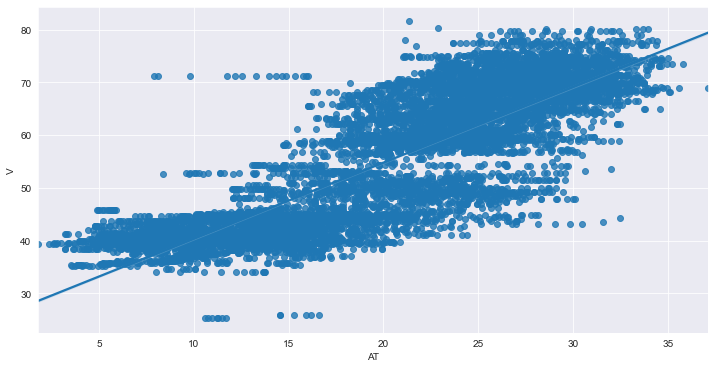

In [7]:
plt.figure(figsize=(12,6))
sns.regplot(x='AT', y='V', data=dataset)

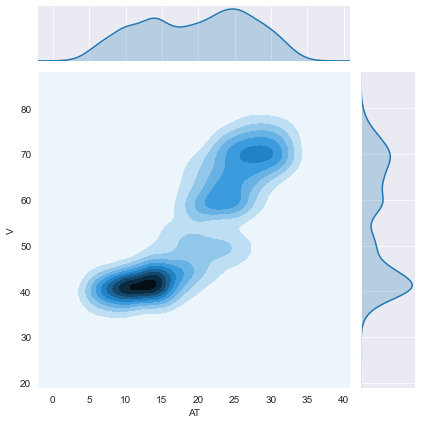

In [8]:
sns.jointplot(x='AT', y='V', data=dataset, kind='kde')

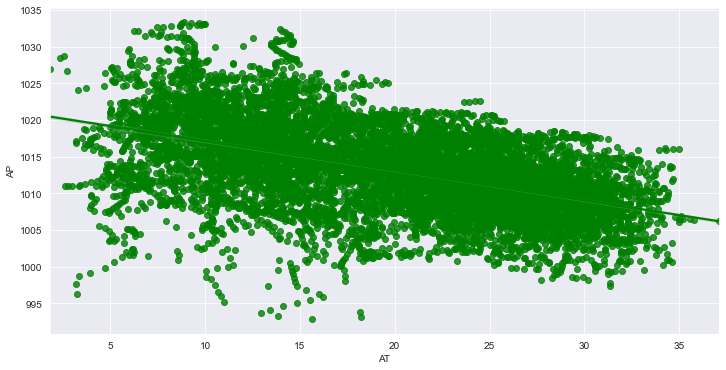

In [9]:
plt.figure(figsize=(12,6))
sns.regplot(x='AT', y='AP', data=dataset, color='g')

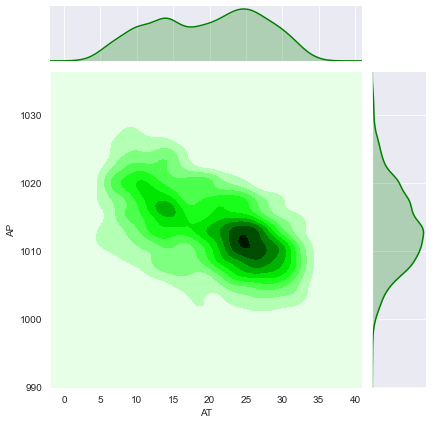

In [10]:
sns.jointplot(x='AT', y='AP', data=dataset, color='g', kind='kde')

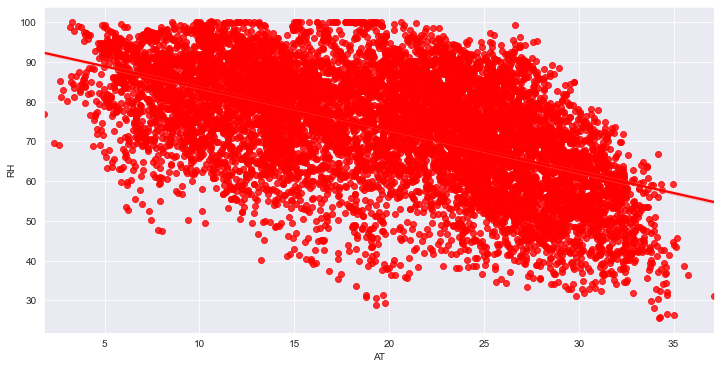

In [11]:
plt.figure(figsize=(12,6))
sns.regplot(x='AT', y='RH', data=dataset, color='r')

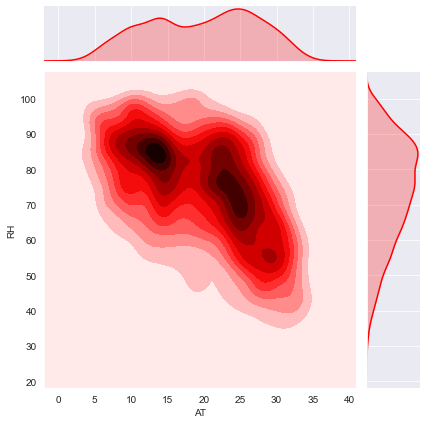

In [12]:
sns.jointplot(x='AT', y='RH', data=dataset, color='r', kind='kde')

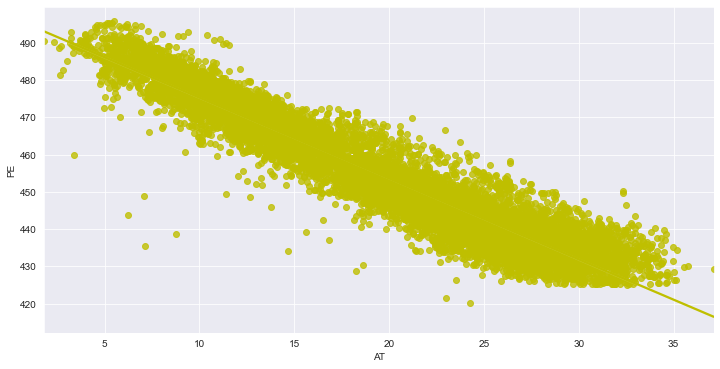

In [13]:
plt.figure(figsize=(12,6))
sns.regplot(x='AT', y='PE', data=dataset, color='y')

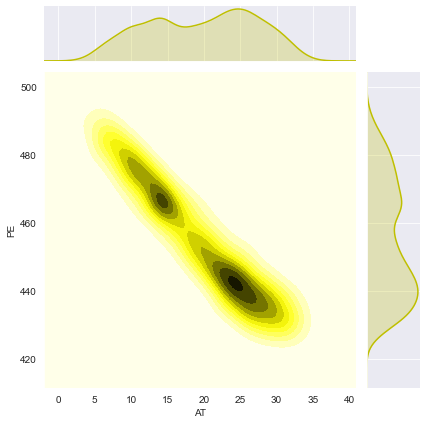

In [14]:
sns.jointplot(x='AT', y='PE', data=dataset, color='y', kind='kde')

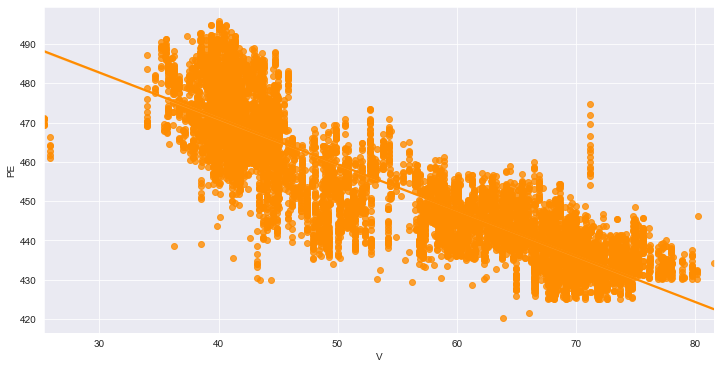

In [15]:
plt.figure(figsize=(12,6))
sns.regplot(x='V', y='PE', data=dataset, color='darkorange')

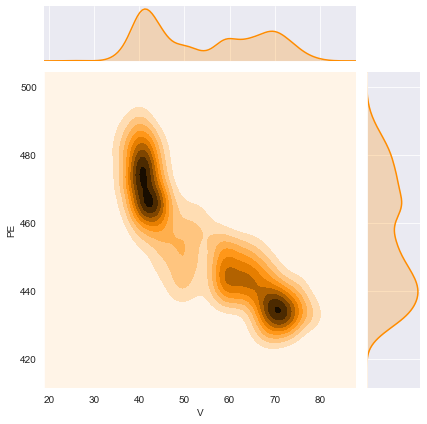

In [16]:
sns.jointplot(x='V', y='PE', data=dataset, color='darkorange', kind='kde')

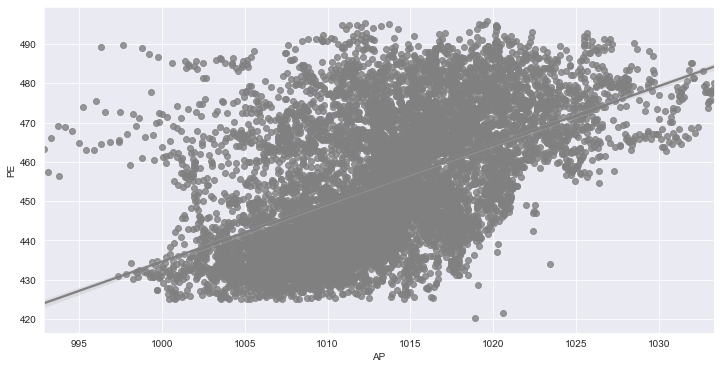

In [17]:
plt.figure(figsize=(12,6))
sns.regplot(x='AP', y='PE', data=dataset, color='grey')

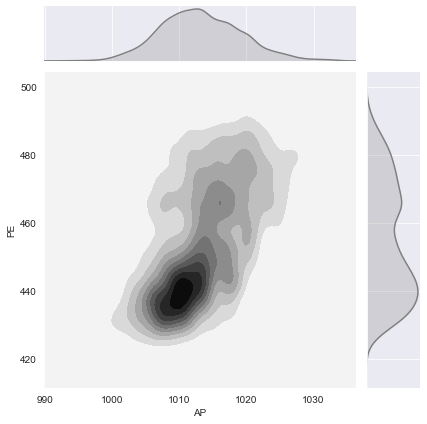

In [18]:
sns.jointplot(x='AP', y='PE', data=dataset, color='grey', kind='kde')

(array([0.5, 1.5, 2.5, 3.5, 4.5]), <a list of 5 Text major ticklabel objects>)

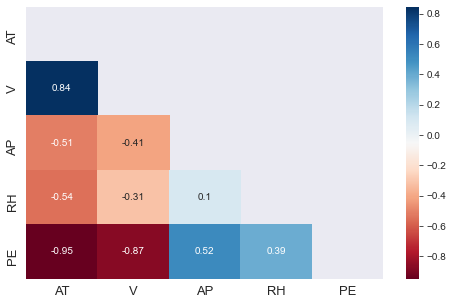

In [19]:
corr = dataset.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(8,5))
sns.heatmap(corr, cmap='RdBu', annot=True, mask=mask)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)

## Splitting the dataset into the Training set and Test set

In [20]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [21]:
y = y.reshape(len(y),1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Feature Scalling

In [22]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)

## Training the Decision Tree Regression model on the Training set

In [23]:
dtree_model = DecisionTreeRegressor(random_state = 0)
dtree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

## Predicting the Test set results

In [24]:
dtree_pred = sc_y.inverse_transform(dtree_model.predict(sc_X.transform(X_test)))
np.set_printoptions(precision=2)
print(np.concatenate((dtree_pred.reshape(len(dtree_pred),1), y_test.reshape(len(y_test),1)),1))

[[431.37 431.23]
 [459.59 460.01]
 [460.06 461.14]
 ...
 [471.46 473.26]
 [437.76 438.  ]
 [462.55 463.28]]


In [25]:
r2_score(y_test, dtree_pred)

0.924689987529388

## Training the Random Forest Regression model on the Training set

In [26]:
rf_model = RandomForestRegressor(random_state=0)
rf_model.fit(X_train, y_train)

<ipython-input-26-bf11635107b2>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=0)

## Predicting the Test set results

In [27]:
rf_pred = sc_y.inverse_transform(rf_model.predict(sc_X.transform(X_test)))
np.set_printoptions(precision=2)
print(np.concatenate((rf_pred.reshape(len(rf_pred),1), y_test.reshape(len(y_test),1)),1))

[[433.74 431.23]
 [457.71 460.01]
 [463.28 461.14]
 ...
 [468.92 473.26]
 [439.17 438.  ]
 [460.94 463.28]]


## Training the Support Vector Regression model on the Training set

In [28]:
svr_model = SVR(kernel = 'rbf')
svr_model.fit(X_train, y_train)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

## Predicting the Test set result

In [29]:
svr_pred = sc_y.inverse_transform(svr_model.predict(sc_X.transform(X_test)))
np.set_printoptions(precision=2)
print(np.concatenate((svr_pred.reshape(len(svr_pred),1), y_test.reshape(len(y_test),1)),1))

[[434.05 431.23]
 [457.94 460.01]
 [461.03 461.14]
 ...
 [470.6  473.26]
 [439.42 438.  ]
 [460.92 463.28]]


In [30]:
r2_score(y_test, svr_pred)

0.9480784049986258

## Evaluating the Model Performance

In [31]:
# Decision Tree Regression
r2_dtree = r2_score(y_test, dtree_pred)
mae_dtree = mean_absolute_error(y_test, dtree_pred)
mse_dtree = mean_squared_error(y_test, dtree_pred)

# Random Forest Regression
r2_rf = r2_score(y_test, rf_pred)
mae_rf = mean_absolute_error(y_test, rf_pred)
mse_rf = mean_squared_error(y_test, rf_pred)

# Support Vector Regression
r2_svr = r2_score(y_test, svr_pred)
mae_svr = mean_absolute_error(y_test, svr_pred)
mse_svr = mean_squared_error(y_test, svr_pred)

In [32]:
pd.DataFrame(index=['R2 Score','Mean Absolute Error (MAE)','Mean Squaed Error (MSE)'],
             columns=['Decision Tree', 'Random Forest', 'Support Vector'],
             data=[[r2_dtree, r2_rf, r2_svr], [mae_dtree, mae_rf, mae_svr], [mse_dtree, mse_svr, mse_svr]])

,Decision Tree,Random Forest,Support Vector
R2 Score,0.924690,0.965134,0.948078
Mean Absolute Error (MAE),3.098814,2.344281,2.995178
Mean Squaed Error (MSE),22.027263,15.186435,15.186435
